<a href="https://colab.research.google.com/github/salmanshaikssk007/academic_analysis_dv/blob/main/Visualization_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Description about the dataset

The dataset, `bd_students_per.csv`, consists of 8,612 rows and 24 columns, with details about students in Bangladesh, including demographics, academic performance, parental involvement, and extracurricular activities. Below is a brief description of key variables:

    • Demographic Details: Includes age, gender, and location.
    • Academic Performance: Scores in English, Math, Science, Social Science, and Art/Culture.
    • Parental Involvement: Includes variables like mother’s education, father’s education, and guardian information.
    • Other Factors: Includes study time, attendance, and participation in extracurricular activities.

This dataset helps explore the relationship between academic performance and influencing factors like parental involvement, location, or extracurricular activities.




Step 2: Dataset Summary

Key findings:

    • Age: Ranges from 10 to 24 years, with an average of ~16.6 years.
    • Academic Scores: Most scores (English, Math, etc.) cluster around 70-85.
    • Attendance: Ranges from 30% to 100%, with a mean of 74%.

Step 3: Data Cleaning

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'bd_students_per.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
print("Dataset Information:")
data.info()
print("\nDataset Description:")
print(data.describe())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  studytime   

In [ ]:
# Step 2: Check and clean missing values
missing_summary = data.isnull().sum()
print("\nMissing Values Summary:")
print(missing_summary)



Missing Values Summary:
id                              0
full_name                       0
age                             0
gender                          0
location                        1
family_size                     0
mother_education               10
father_education                4
mother_job                      0
father_job                      0
guardian                        0
parental_involvement            0
internet_access                 0
studytime                       0
tutoring                        0
school_type                     0
attendance                      0
extra_curricular_activities     0
english                         0
math                            0
science                         0
social_science                  0
art_culture                     0
stu_group                       0
dtype: int64


In [ ]:
# Drop rows with missing values
cleaned_data = data.dropna()

# Verify the cleaned dataset
cleaned_summary = cleaned_data.isnull().sum()
print("\nCleaned Missing Values Summary:")
print(cleaned_summary)


Cleaned Missing Values Summary:
id                             0
full_name                      0
age                            0
gender                         0
location                       0
family_size                    0
mother_education               0
father_education               0
mother_job                     0
father_job                     0
guardian                       0
parental_involvement           0
internet_access                0
studytime                      0
tutoring                       0
school_type                    0
attendance                     0
extra_curricular_activities    0
english                        0
math                           0
science                        0
social_science                 0
art_culture                    0
stu_group                      0
dtype: int64


For analysis, the variables selected are:

    1. Academic Scores (English, Math, Science, etc.): To evaluate academic performance.
    2. Parental Involvement: Includes variables like mother's education, father's education, and guardian.
    3. Attendance: To observe its impact on performance.

The goal is to explore how factors like parental involvement and attendance influence academic performance.

In [ ]:
# Step 1: Calculate the Average Academic Score for each student
cleaned_data['Average_Score'] = cleaned_data[['english', 'math', 'science', 'social_science', 'art_culture']].mean(axis=1)

# Step 2: Cluster Students Based on Academic Performance
def performance_cluster(score):
    if score < 60:
        return 'Low'
    elif 60 <= score < 85:
        return 'Average'
    else:
        return 'High'

cleaned_data['Performance_Cluster'] = cleaned_data['Average_Score'].apply(performance_cluster)

# Step 3: Cluster Students Based on Attendance
bins = [0, 50, 75, 100]
labels = ['Low Attendance', 'Moderate Attendance', 'High Attendance']
cleaned_data['Attendance_Cluster'] = pd.cut(cleaned_data['attendance'], bins=bins, labels=labels)

# Assuming Parental_Involvement_Score is a column in the dataset
def parental_involvement_cluster(status):
    if status == 'Yes':
        return 'High'
    else:
        return 'Low'

# checking for parental involvement score
if 'parental_involvement' in cleaned_data.columns:
    cleaned_data['Parental_Involvement_Cluster'] = cleaned_data['parental_involvement'].apply(parental_involvement_cluster)
else:
    print("Parental_Involvement_Score column not found in the dataset.")

<ipython-input-29-5550cb0c77b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Average_Score'] = cleaned_data[['english', 'math', 'science', 'social_science', 'art_culture']].mean(axis=1)
<ipython-input-29-5550cb0c77b8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Performance_Cluster'] = cleaned_data['Average_Score'].apply(performance_cluster)
<ipython-input-29-5550cb0c77b8>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<ipython-input-30-433f997738ab>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attendance_Cluster', y='Average_Score', data=cleaned_data, palette='coolwarm')


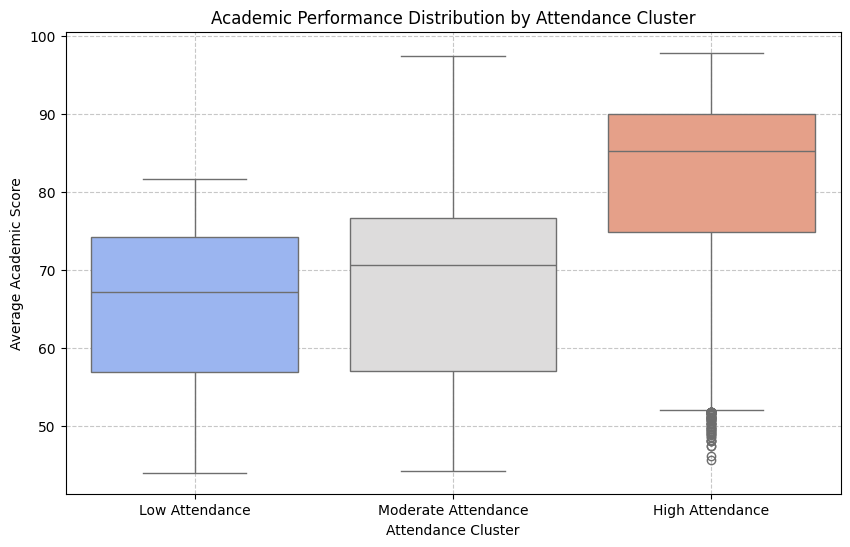

In [ ]:
# Step 5: Visualization using Seaborn (Advanced Graphs)

# 1. Boxplot: Academic Performance Distribution by Attendance Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attendance_Cluster', y='Average_Score', data=cleaned_data, palette='coolwarm')
plt.title('Academic Performance Distribution by Attendance Cluster')
plt.xlabel('Attendance Cluster')
plt.ylabel('Average Academic Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


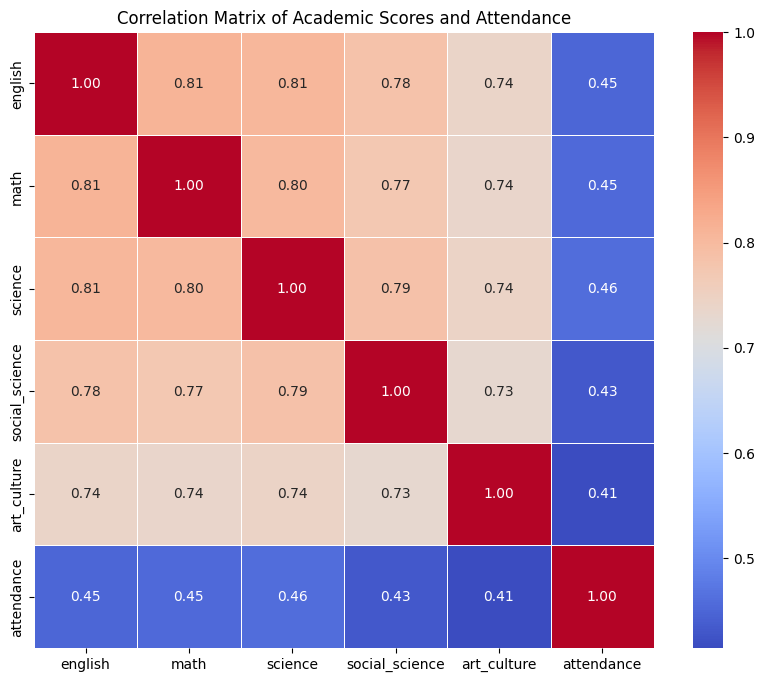

In [ ]:
# 2. Heatmap: Correlation Matrix of Numerical Features
plt.figure(figsize=(10, 8))
correlation_matrix = cleaned_data[['english', 'math', 'science', 'social_science', 'art_culture', 'attendance']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Academic Scores and Attendance')
plt.show()

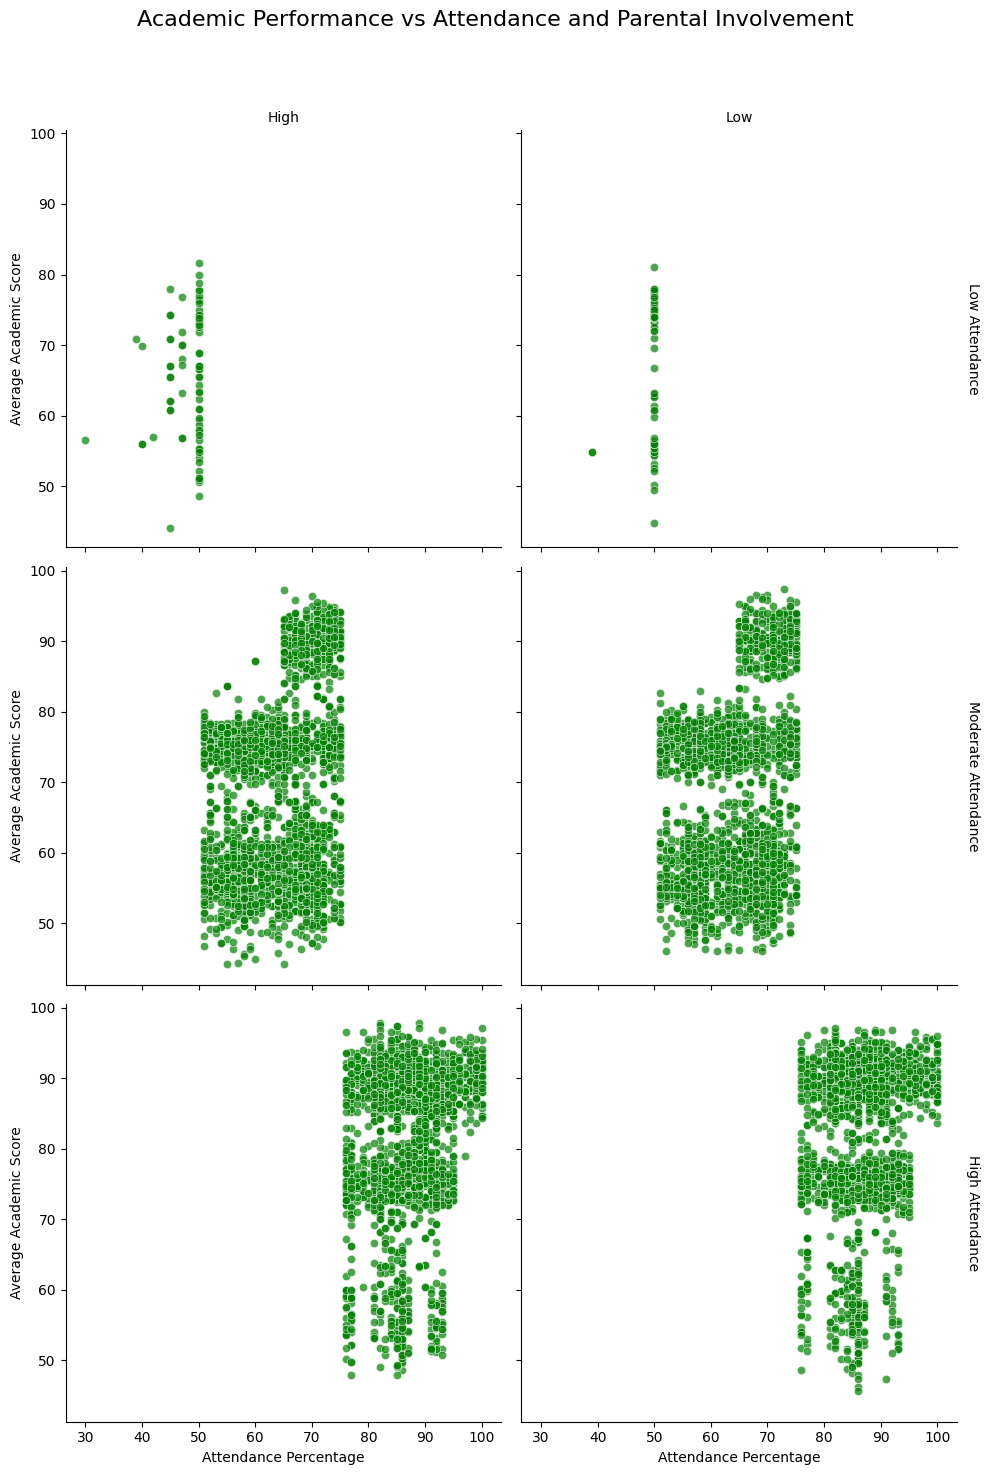

In [ ]:
# 3. FacetGrid: Academic Performance vs Parental Involvement and Attendance Cluster
g = sns.FacetGrid(cleaned_data, col='Parental_Involvement_Cluster', row='Attendance_Cluster', margin_titles=True, height=5)
g.map(sns.scatterplot, 'attendance', 'Average_Score', alpha=0.7, color='green')
g.set_axis_labels('Attendance Percentage', 'Average Academic Score')
g.set_titles(col_template="{col_name}", row_template="{row_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Academic Performance vs Attendance and Parental Involvement', fontsize=16)
plt.show()

In [34]:
# Print the summarized results
performance_counts = cleaned_data['Performance_Cluster'].value_counts()
attendance_summary = cleaned_data.groupby('Attendance_Cluster')['Average_Score'].mean()
parental_involvement_summary = cleaned_data.groupby('Parental_Involvement_Cluster')['Average_Score'].mean()

print("Performance Cluster Counts:")
print(performance_counts)

print("\nAttendance Cluster Summary:")
print(attendance_summary)

print("\nParental Involvement Cluster Summary:")
print(parental_involvement_summary)


Performance Cluster Counts:
Performance_Cluster
Average    3984
High       2633
Low        1982
Name: count, dtype: int64

Attendance Cluster Summary:
Attendance_Cluster
Low Attendance         66.253247
Moderate Attendance    68.617066
High Attendance        80.951206
Name: Average_Score, dtype: float64

Parental Involvement Cluster Summary:
Parental_Involvement_Cluster
High    74.303032
Low     74.011663
Name: Average_Score, dtype: float64


<ipython-input-34-2cb8970bce13>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attendance_summary = cleaned_data.groupby('Attendance_Cluster')['Average_Score'].mean()


Description of the Analysis:

This analysis investigates the relationship between academic performance, attendance, and parental involvement among students. The dataset contains various student attributes such as subject scores, attendance percentages, and parental involvement. The goal is to classify students into different clusters based on their academic performance, attendance, and parental involvement, and analyze how these factors correlate with each other.

Steps in the Analysis:

    1. Calculate Average Academic Score: The average score for each student was calculated by averaging their scores in five subjects: English, Math, Science, Social Science, and Art/Culture.
    2. Performance Clustering: Students were classified into three performance clusters based on their average academic score:
        • Low: Average score less than 60
        • Average: Average score between 60 and 84
        • High: Average score 85 or higher
    3. Attendance Clustering: Students were classified into three attendance clusters:
        • Low Attendance: Attendance percentage less than 50%
        • Moderate Attendance: Attendance percentage between 50% and 75%
        • High Attendance: Attendance percentage between 75% and 100%
    4. Parental Involvement Clustering: Students were classified based on their parental involvement:
        • High: If the parent is involved (marked as Yes)
        • Low: If the parent is not involved (marked as No)
    5. Analysis: The data was analyzed to understand the number of students in each cluster and the average academic score for each cluster of attendance and parental involvement.

Summary of the Results:

    1. Performance Cluster Counts:
        • Average: 3,984 students fall into the “Average” performance category.
        • High: 2,633 students are in the “High” performance category.
        • Low: 1,982 students are in the “Low” performance category.
    2. Attendance Cluster Summary:
        • Low Attendance: Average score = 66.25
        • Moderate Attendance: Average score = 68.62
        • High Attendance: Average score = 80.95
        • This shows that students with higher attendance tend to have higher average academic scores.
    3. Parental Involvement Cluster Summary:
        • High Parental Involvement: Average score = 74.30
        • Low Parental Involvement: Average score = 74.01
        • The difference in average scores between high and low parental involvement is minimal, suggesting that parental involvement may not have a significant impact on academic performance in this dataset.

Visualizations:

    • Boxplot: A boxplot was used to show the distribution of academic scores across attendance clusters.
    • Heatmap: A heatmap was used to visualize correlations between academic scores and attendance.
    • FacetGrid: A FacetGrid was used to explore the relationship between academic performance, parental involvement, and attendance.

Conclusion:

    • The analysis suggests that higher attendance is positively correlated with better academic performance. However, parental involvement does not show a significant difference in academic performance.

This analysis provides insights into how attendance and parental involvement impact student academic outcomes.